Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Evan"
COLLABORATORS = ""

---

# CS110 Pre-class Work 10.2

## Question 1.

# Question 1. 

Fill in the code below for the method `insert` for a node in a BST. This should be a matter of copy-paste, as this is part of the pre-class work for lesson 8.2

In [2]:
## Binary Search Tree
##
class Node:
    def __init__(self, val):
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.data = val

    def insert(self, node):
        """inserts a node into a *non-empty* tree rooted at the node, returns the root"""
        # YOUR CODE HERE
        if self.data > node.data:
            if self.l_child is None:
                self.l_child = node
                node.parent = self
            else:
                self.l_child.insert(node)
        else:
            if self.r_child is None:
                self.r_child = node
                node.parent = self
            else:
                self.r_child.insert(node)
        return self
        raise NotImplementedError()

## Question 2. 

Below you are provided the code for insertion in an AVL tree. However, to make it work, you need to complete the functions `left_rotate` and `right_rotate`. Use the pseudo-code `LEFT-ROTATE` in Cormen et al. and the one you wrote for `RIGHT-ROTATE` from lesson 10.1 to fill in the code.

In [3]:

## AVL Tree
##
class AVLNode(Node):
    def __init__(self, val):
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.data = val
        self.lr_balance = 0
        self.height = 0
    
    def get_violating_node(self, root):
        if self == root:
            return None
        if self == self.parent.r_child:
            if not self.parent.l_child:
                self.parent.height = max(-1, self.height) + 1
                self.parent.lr_balance = -1-self.height
            else:
                self.parent.height = max(self.parent.l_child.height, self.height) + 1
                self.parent.lr_balance = self.parent.l_child.height-self.height
        else:
            if not self.parent.r_child:
                self.parent.height = max(-1, self.height) + 1
                self.parent.lr_balance = self.height + 1
            else:
                self.parent.height = max(self.parent.r_child.height, self.height) + 1
                self.parent.lr_balance = self.height-self.parent.r_child.height
        if abs(self.parent.lr_balance) > 1:
            return self.parent
        else:
            return self.parent.get_violating_node(root)
                

    def insert(self, node):
        """inserts a node into a *non-empty* tree rooted at the node, returns the root"""

        violating_node = None
        curr_node = self
        root = self
        while curr_node:
            if curr_node.data > node.data:
                if curr_node.l_child is None:
                    curr_node.l_child = node
                    node.parent = curr_node
                    break
                else:
                    curr_node = curr_node.l_child 
            else:   
                if curr_node.r_child is None:
                    curr_node.r_child = node
                    node.parent = curr_node
                    break
                else:
                    curr_node = curr_node.r_child
        # fix up the tree
        violating_node = node.get_violating_node(root)
        
        while violating_node:
            x = violating_node
            if x.lr_balance < 0: # right heavy
                y = x.r_child
                if y.lr_balance < 0:
                    root = left_rotate(x, root)
                    x.lr_balance = 0
                    x.height -= 2
                    y.lr_balance = 0
                elif y.lr_balance == 0:
                    root = left_rotate(x, root)
                    x.lr_balance = -1
                    x.height -= 1
                    y.lr_balance = 1
                    y.height += 1 
                else:
                    z = x.r_child
                    y = z.l_child
                    root = right_rotate(z, root)
                    root = left_rotate(x, root)
                    x.height -= 2
                    y.lr_balance = 0
                    y.height += 1
                    z.height -= 1 
                    if y.lr_balance == -1: 
                        x.lr_balance = 1
                        z.lr_balance = 0
                    elif y.lr_balance == 0: 
                        x.lr_balance = 0
                        z.lr_balance = 0
                    else: 
                        x.lr_balance = 0
                        z.lr_balance = -1 
       
            else:
                y = x.l_child
                if y.lr_balance > 0:
                    root = right_rotate(x, root)
                    x.lr_balance = 0
                    x.height -= 2
                    y.lr_balance = 0
                elif y.lr_balance == 0:
                    root = right_rotate(x, root)
                    x.lr_balance = 1
                    x.height -= 1
                    y.lr_balance = -1
                    y.height += 1
                else:
                    z = x.l_child 
                    y = z.r_child
                    root = left_rotate(z, root)
                    root = right_rotate(x, root)
                    x.height -= 2
                    y.lr_balance = 0
                    y.height += 1
                    z.height -= 1
                    if y.lr_balance == -1: # B: k-2, C: k-1
                        x.lr_balance = 0
                        z.lr_balance = 1
                    elif y.lr_balance == 0: # B=C=k-1
                        x.lr_balance = 0
                        z.lr_balance = 0
                    else: # B: k-1, C: k-2
                        x.lr_balance = -1
                        z.lr_balance = 0
            if root == y: 
                violating_node = None
                continue
            elif y == y.parent.l_child:
                y.parent.lr_balance = y.height - y.parent.r_child.height
                y.parent.height = max(y.height, y.parent.r_child.height) + 1
            elif y == y.parent.r_child:
                y.parent.lr_balance = y.parent.l_child.height - y.height
                y.parent.height = max(y.parent.l_child.height, y.height) + 1
            if abs(y.parent.lr_balance) > 1:
                violating_node = y.parent
            else: violating_node = None 
        return root

    def inorder(self): 
            """returns a list of all data in the tree rooted at root produced using an in order traversal"""
            lst = []
            root = self
            def sub_inorder(root):
                if not root is None:
                    sub_inorder(root.l_child)
                    lst.append(root.data)
                    sub_inorder(root.r_child)
            sub_inorder(root)
            return lst

def left_rotate(x, root):
    """Performs left-rotation on x, returns the root.
    This procedure does NOT update any augmented data (if any)
    of the nodes (e.g., height, left-right balance, etc.), simply
    changing the pointers and the parent-child relationship,
    and setting the new root (if any). The updating task belongs to 
    the procedure that calls this function.
    
    Input:
    - x: a node, to be performed the rotation on
    - root: the root node of the tree.
    
    Output:
    - root: the (new) root of the tree
    """
    # YOUR CODE HERE
    y = x.r_child
    x.r_child = y.l_child
    if y.l_child != None:
        y.l_child.parent = x
    y.parent = x.parent
    if x.parent == None:
        root = y
    elif x == x.parent.l_child:
        x.parent.l_child = y
    elif x == x.parent.r_child:
        x.parent.r_child = y
    y.l_child = x
    x.parent = y
    return root
    
    #raise NotImplementedError()


In [4]:
def right_rotate(y, root):
    """Performs right-rotation on x, returns the root.
    This procedure does NOT update any augmented data (if any)
    of the nodes (e.g., height, left-right balance, etc.), simply
    changing the pointers and the parent-child relationship,
    and setting the new root (if any). The updating task belongs to 
    the procedure that calls this function.
    
    Input:
    - x: a node, to be performed the rotation on
    - root: the root node of the tree.
    
    Output:
    - root: the (new) root of the tree
    """
    # YOUR CODE HERE
    x = y.l_child
    y.l_child = x.r_child
    if x.r_child != None:
        x.r_child.parent = y
    x.parent = y.parent
    if y.parent == None:
        root = x
    elif y == y.parent.r_child:
        y.parent.r_child = x
    elif y == y.parent.l_child:
        y.parent.l_child = x
    x.r_child = y
    y.parent = x
    return root
    #raise NotImplementedError()

## Question 3.
We will now use the code above to build a BST and an AVL by randomly inserting to the trees, then produce a plot to compare their expected heights. **Carefully** follow the instructions below to fill in the code.

### Question 3a.

Complete the function `height` to compute the height of a tree rooted at a node. This should also be a matter of copying and pasting because you can utilize what you wrote for `max_depth` in lesson 9.1 (recall that maximum depth of a tree rooted at a node is the node's height in the tree.)

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt

def height(node):
    """Finds the height of a BST rooted at a node.
    
    Input:
    - node: a node, the root of the BST
    
    Output:
    - h: int, the height of the BST"""
    # YOUR CODE HERE
    l_height = 0
    r_height = 0
    if node.l_child:
        l_height += 1
        l_height += height(node.l_child)
    if node.r_child:
        r_height += 1
        r_height += height(node.r_child)
    
    return max(l_height,r_height) 
    raise NotImplementedError()
    


# Question 3b.
Fill in the `get_expected_height_stats` function below to get the data ready for plotting. You need to follow the template and the instructions written in the code to produce consistent data to plot. 

In [6]:
import random 

def get_expected_height_stats(iterations):
    """Generate the data for plotting the expected heights of BST and AVL.
    
    Input:
    - iterations: int, the number of times to insert into the tree for each 
    value of the number of nodes to insert. For each iteration, a height is 
    computed. After all the iterations, all the computed heights are averaged
    to get an estimate of the expected height. 
    
    Output:
    - bst_expected_heights, avl_expected_heights: list of float, containing
    the expected heights for the two types of trees. Each element in each list
    corresponds to one value of n, the number of nodes in the tree. The values 
    of n are taken from range(1,500,10) (1, 11, 21, 31, etc.)"""
    bst_expected_heights = []
    avl_expected_heights = []
    
    for n in range(1,500,10):
        # For each value of n, you need to insert n nodes to each tree for 
        # `iterations` times. For each iteration:
            # 1. Create a list containing all integers from 0 to n-1
            # 2. SET A RANDOM SEED TO THE INDEX OF THE CURRENT ITERATION and
            # shuffle the list. For example, if your code is `for i in range(iterations)`,
            # then use random.seed(i). Also, see the sample code in the next step.
            # 3. Create BST nodes and AVL nodes taking the values from the list 
            # and insert those nodes to the respective trees IN THAT ORDER.
            # Do make use of these lines of code:
                # vals = list(range(int(n)))
                # random.seed(i)
                # random.shuffle(vals)
                # BSTnodes = [Node(val) for val in vals]
                # AVLnodes = [AVLNode(val) for val in vals]
            # 4. After inserting to both trees, compute the heights.
                
        # YOUR CODE HERE
        vals = list(range(int(n)))
        bst_tot = 0
        avl_tot = 0
        for i in range(iterations):
            random.seed(i)
            random.shuffle(vals)
            BSTnodes = [Node(val) for val in vals]
            AVLnodes = [AVLNode(val) for val in vals]
            bst = None
            avl = None
            
            for node in BSTnodes:
                if bst == None:
                    bst = node
                else: 
                    bst = bst.insert(node)
            
            for node in AVLnodes:
                if avl == None:
                    avl = node
                else: 
                    avl = avl.insert(node)
            
#             BSTroot = BSTnodes[0]
#             AVLroot = AVLnodes[0]
#             for node in range(1,len(BSTnodes)):
#                 BSTroot = BSTroot.insert(BSTnodes[node]) 
#             for node in range(1,len(AVLnodes)):
#                 AVLroot = AVLroot.insert(AVLnodes[node]) 
            bst_tot += height(bst)
            avl_tot += avl.height
        bst_expected_heights.append(bst_tot/iterations)
        avl_expected_heights.append(avl_tot/iterations)
            
       # raise NotImplementedError()
    return bst_expected_heights, avl_expected_heights

In [7]:
bst_expected_heights, avl_expected_heights = get_expected_height_stats(10)
print(bst_expected_heights, avl_expected_heights)

[0.0, 5.3, 7.1, 7.7, 8.5, 10.1, 11.2, 11.7, 10.9, 11.3, 11.5, 12.0, 12.4, 12.7, 13.8, 13.0, 14.4, 14.1, 14.4, 15.4, 15.0, 15.3, 15.3, 14.5, 15.5, 16.2, 15.3, 16.3, 16.5, 16.7, 17.2, 17.1, 15.7, 16.8, 17.0, 16.5, 17.1, 16.4, 17.8, 17.7, 17.7, 16.9, 16.5, 17.6, 18.6, 17.5, 17.5, 17.8, 17.7, 19.2] [0.0, 3.0, 4.0, 5.0, 5.2, 5.8, 6.0, 6.0, 6.8, 7.0, 7.0, 7.0, 7.1, 7.5, 7.4, 7.8, 8.0, 8.0, 8.0, 8.0, 8.1, 8.2, 8.2, 8.1, 8.5, 8.4, 8.8, 8.8, 8.8, 8.9, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.1, 9.3, 9.1, 9.1, 9.0, 9.3, 9.7, 9.6, 9.7, 9.6, 9.6, 9.6, 9.7]


In [8]:
bst_expected_heights, avl_expected_heights = get_expected_height_stats(10)

assert(bst_expected_heights == [0.0, 5.3, 6.8, 7.8, 9.9, 10.2, 9.9, 11.2, 12.0, 12.2, 12.3, 
                                12.2, 12.1, 13.4, 13.2, 13.0, 14.3, 14.7, 13.8, 14.1, 14.5, 
                                15.5, 14.9, 16.0, 16.1, 16.2, 15.4, 17.5, 16.7, 16.1, 16.4, 
                                17.4, 16.1, 17.3, 16.8, 16.2, 16.7, 17.5, 17.1, 18.4, 17.5, 
                                17.0, 17.8, 18.4, 18.3, 17.8, 17.7, 17.3, 18.0, 19.5])
assert(avl_expected_heights == [0.0, 3.0, 4.1, 5.0, 5.4, 6.0, 6.0, 6.1, 6.8, 6.9, 7.0, 7.0, 
                                7.3, 7.3, 7.5, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.2, 8.2, 8.0, 
                                8.4, 8.5, 8.7, 8.8, 8.9, 8.8, 8.9, 9.0, 9.0, 9.0, 9.0, 9.0, 
                                9.0, 9.0, 9.3, 9.1, 9.1, 9.3, 9.3, 9.7, 9.5, 9.6, 9.8, 9.8, 
                                9.9, 9.8])


AssertionError: 

If you have done everything correctly, running the following code will produce a plot that compares the expected heights of BST and AVL tree. 

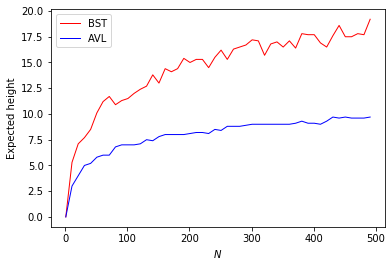

In [11]:
bst_expected_heights, avl_expected_heights = get_expected_height_stats(10)

plt.plot(range(1,500,10), bst_expected_heights, color = 'red',label = 'BST', linewidth = 1.0)
plt.plot(range(1,500,10), avl_expected_heights, color = 'blue',label = 'AVL', linewidth = 1.0)
plt.xlabel('$N$', fontsize=10)
plt.ylabel('Expected height', fontsize=10)
plt.legend()

In [9]:
bst_expected_heights,avl_expected_heights = get_expected_height_stats(10)

In [10]:
print(bst_expected_heights,avl_expected_heights )

[0.0, 5.3, 7.1, 7.7, 8.5, 10.1, 11.2, 11.7, 10.9, 11.3, 11.5, 12.0, 12.4, 12.7, 13.8, 13.0, 14.4, 14.1, 14.4, 15.4, 15.0, 15.3, 15.3, 14.5, 15.5, 16.2, 15.3, 16.3, 16.5, 16.7, 17.2, 17.1, 15.7, 16.8, 17.0, 16.5, 17.1, 16.4, 17.8, 17.7, 17.7, 16.9, 16.5, 17.6, 18.6, 17.5, 17.5, 17.8, 17.7, 19.2] [0.0, 3.0, 4.0, 5.0, 5.2, 5.8, 6.0, 6.0, 6.8, 7.0, 7.0, 7.0, 7.1, 7.5, 7.4, 7.8, 8.0, 8.0, 8.0, 8.0, 8.1, 8.2, 8.2, 8.1, 8.5, 8.4, 8.8, 8.8, 8.8, 8.9, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.1, 9.3, 9.1, 9.1, 9.0, 9.3, 9.7, 9.6, 9.7, 9.6, 9.6, 9.6, 9.7]


In [ ]:
b = AVLNode(4)
a = AVLNode(6)
c = AVLNode(3)
d = AVLNode(2)
e = AVLNode(1)
b.insert(a)
b.insert(c)
b.insert(d)
b.insert(e)
for i in [a,b,c,d,e]:
    print(height(i))

In [ ]:
a = AVLNode(10)
b = AVLNode(8)
c = AVLNode(20)
d = AVLNode(3)
e = AVLNode(2)

a.insert(b)
a.insert(c)
a.insert(d)

for i in [a,b,c,d]:
    print(height(i))

a.insert(e)

for i in [a,b,c,d,e]:
    print(height(i))